<a href="https://colab.research.google.com/github/KeitaW/Colab-Notebooks/blob/master/210530_students_ans.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# はじめに
このノートブックでは学生の皆さんが提出したネットワークを実際に動作させて，課題のデータがどのように分類されているか確認しています．
ご自身のネットワークがどのAnsに対応するかはお送りしたメールをご確認ください．

また，ここでは各解答で示されたネットワークに対して，第一層の上から順番に$1, 2, \dots$の番号をつけて区別しています．

ネットワークの実装が間違いを含む可能性も（多分に）あります． 「どうもおかしいな」と思った方は遠慮なく `keitaw09+jugyo@gmail.com`までご相談ください．

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## データの生成

In [2]:
def rand(size, a=0, b=1):
    return (b - a) * np.random.random(size) + a

def generate_cluster(x_range=(0, 0.5), y_range=(0, 0.5), npoints=100, label=1):
    return np.array([
                  rand(npoints, *x_range), 
                  rand(npoints, *y_range)
            ]).T, np.ones(npoints) * label

npoints = 100
data1, data1_label = generate_cluster(x_range=(1.5, 2.0), y_range=(1.5, 2.0), npoints=npoints, label=1)
data2, data2_label = generate_cluster(x_range=(1.5, 2.0), y_range=(0.0, 0.5), npoints=npoints, label=2)
data3, data3_label = generate_cluster(x_range=(0.0, 0.5), y_range=(0.0, 0.5), npoints=npoints, label=1)
data4, data4_label = generate_cluster(x_range=(0.0, 0.5), y_range=(1.5, 2.0), npoints=npoints, label=2)

In [3]:
X = np.concatenate((data1, data3, data2, data4)) 
y = np.concatenate((data1_label, data3_label, data2_label, data4_label))
data_df = pd.DataFrame({
    "x": X[:, 0],
    "y": X[:, 1],
    "label": y
})

## 色々なニューロンを実装するための雛形となるクラスを用意する

In [4]:
class Neuron:
    def __init__(self, W, bias, layers=None):
        self.W = W
        self.bias = bias
        self.layers = layers # Neuronのリストのリスト．入力層から順に並んでいる
    def forward(self, X):
        Z = X
        if self.layers is not None:
            for layer in self.layers:
                Z = np.array([list(neuron.forward(Z)) for neuron in layer]).T
        return np.maximum(np.dot(self.W,  Z.T) + self.bias, 0)[0]

In [5]:
def check_activation(neuron, label):
    """各クラスタ中のデータに対してニューロンがどのように活動するかを可視化する関数
    """
    plt.title(f"activation of {label} neuron")
    plt.scatter(np.ones(npoints), neuron.forward(data1), label="data1")
    plt.scatter(np.ones(npoints)*1.1, neuron.forward(data2), label="data2")
    plt.scatter(np.ones(npoints)*1.2, neuron.forward(data3), label="data3")
    plt.scatter(np.ones(npoints)*1.3, neuron.forward(data4), label="data4")
    plt.xlabel("Cluster")
    plt.ylabel("Activation")
    plt.xticks([])
    plt.legend()

In [6]:
sample_neuron = Neuron(
    W=np.array([[0.1, 0.1]]),
    bias=0.5
)

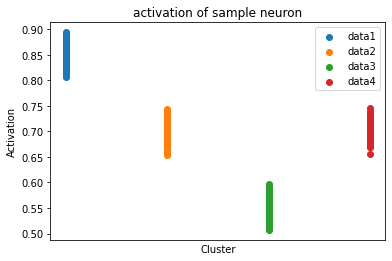

In [7]:
check_activation(sample_neuron, "sample")

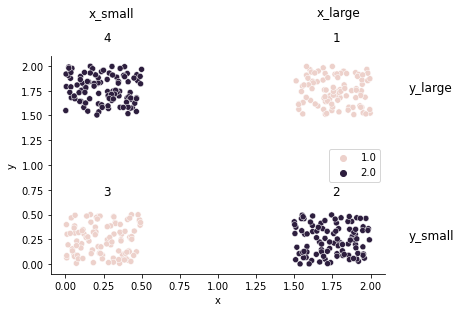

In [8]:
fig, ax = plt.subplots()
sns.scatterplot(x="x", y="y", data=data_df, hue="label", ax=ax)
ax.text(1.75, 2.25, "1", fontsize=12)
ax.text(1.75, 0.7, "2", fontsize=12)
ax.text(0.25, 0.7, "3", fontsize=12)
ax.text(0.25, 2.25, "4", fontsize=12)
ax.text(1.65, 2.5, "x_large", fontsize=12)
ax.text(0.15, 2.5, "x_small", fontsize=12)
ax.text(2.25, 0.25, "y_small", fontsize=12)
ax.text(2.25, 1.75, "y_large", fontsize=12)
ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)
ax.legend(loc="center right")

# Ans1 

In [9]:
neuron1 = Neuron(
    W=np.array([[1.0, -1.0]]),
    bias = -1
)

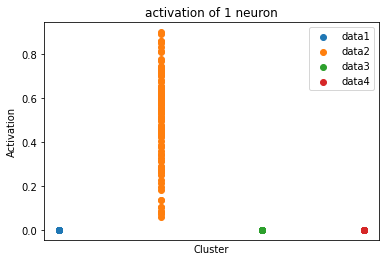

In [10]:
check_activation(neuron1, "1")

In [11]:
neuron2 = Neuron(
    W=np.array([[-1.0, 1.0]]),
    bias = -1
)

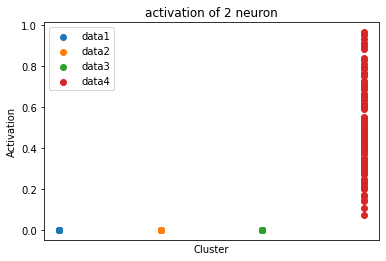

In [12]:
check_activation(neuron2, "2")

In [13]:
neuron3 = Neuron(
    W=np.array([[100.0, 100.0]]),
    bias = -1
)

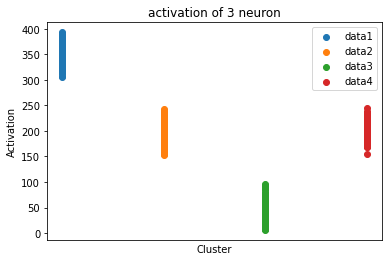

In [14]:
check_activation(neuron3, "3")

In [15]:
layer1 = [[neuron1, neuron2, neuron3]]

In [16]:
neuron4 = Neuron(
    W=np.array([[-1.0, 0.0, 1.0]]),
    bias=-1,
    layers =layer1
)

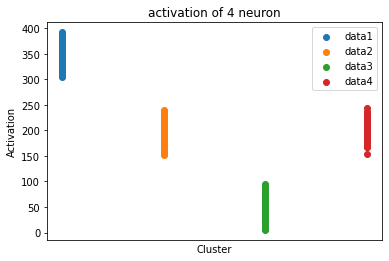

In [17]:
check_activation(neuron4, "4")

In [18]:
neuron5 = Neuron(
    W=np.array([[0.0, -1.0, 1.0]]),
    bias=-1,
    layers =layer1
)

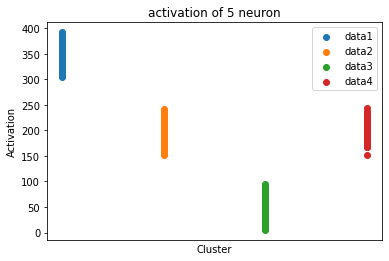

In [19]:
check_activation(neuron5, "5")

In [20]:
neuron6 = Neuron(
    W=np.array([[1.0, 1.0, 0.0]]),
    bias=-1,
    layers =layer1
)

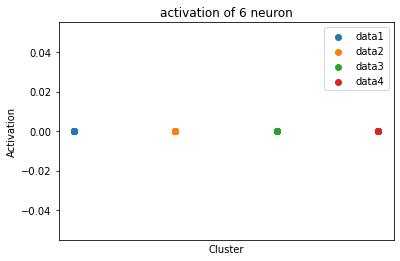

In [21]:
check_activation(neuron6, "6")

In [22]:
layer2 = [[neuron4, neuron5]]

In [23]:
neuron7 = Neuron(
    W=np.array([[0.5, 0.5]]),
    bias=-1,
    layers =layer2
)

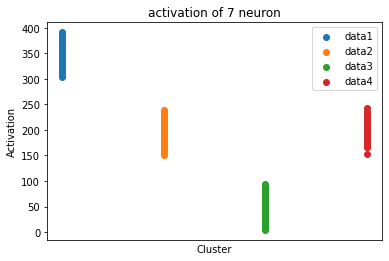

In [24]:
check_activation(neuron7, "7")

In [25]:
neuron7.forward(np.array([[0.5, 0.0], [2.0, 0.0]]))

array([ 47. , 196.5])

# Ans2

In [26]:
neuron1 = Neuron(
    W=np.array([[0.5, 1.0]]),
    bias=-0.5
)

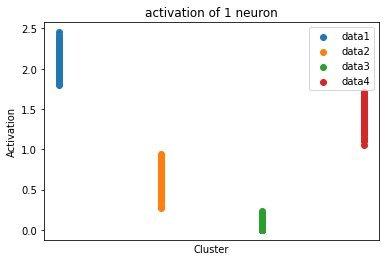

In [27]:
check_activation(neuron1, "1")

In [28]:
neuron2 = Neuron(
    W=np.array([[2.0, 1.5]]),
    bias=-0.5
)

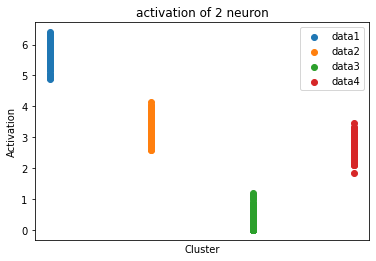

In [29]:
check_activation(neuron2, "2")

In [30]:
neuron3 = Neuron(
    W=np.array([[-1.0, -2.0]]),
    bias=-0.5
)

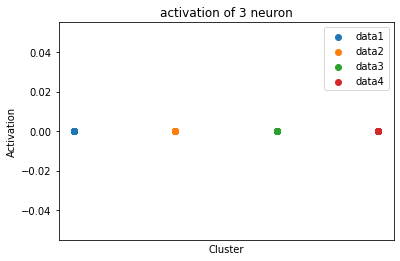

In [31]:
check_activation(neuron3, "3")

In [32]:
neuron4 = Neuron(
    W=np.array([[-2.0, -2.0]]),
    bias=-0.5
)

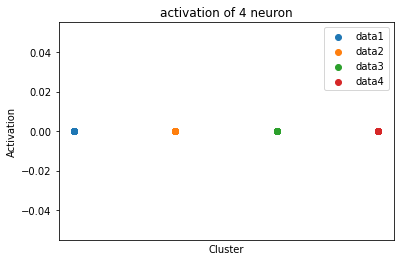

In [33]:
check_activation(neuron4, "4")

In [34]:
layer1 = [[neuron1, neuron2, neuron3, neuron4]]

In [35]:
neuron5 = Neuron(
    W=np.array([[1.0, 0.5, 1.5, 2.0]]),
    bias=-0.5,
    layers=layer1
)

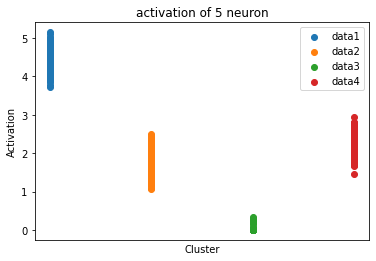

In [36]:
check_activation(neuron5, "5")

In [37]:
neuron6 = Neuron(
    W=np.array([[1.0, 0.5, 0.5, 1.5]]),
    bias=-0.5,
    layers=layer1
)

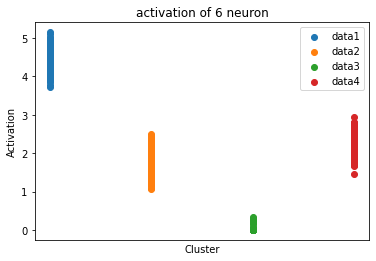

In [38]:
check_activation(neuron6, "6")

In [39]:
neuron7 = Neuron(
    W=np.array([[-1.0, 1.5, -1.0, -1.0]]),
    bias=-0.5,
    layers=layer1
)

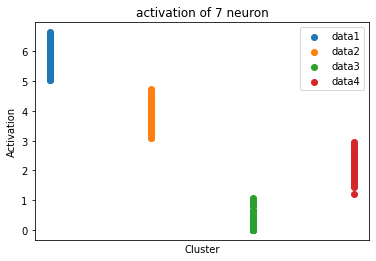

In [40]:
check_activation(neuron7, "7")

In [41]:
neuron8 = Neuron(
    W=np.array([[-1.5, -1.0, -1.5, 0.5]]),
    bias=-0.5,
    layers=layer1
)

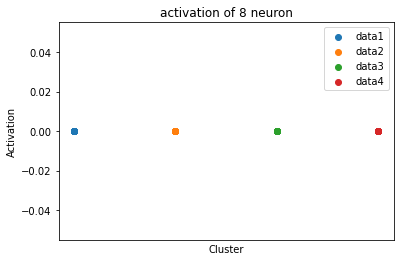

In [42]:
check_activation(neuron8, "8")

In [43]:
layer2 = [[neuron5, neuron6, neuron7, neuron8]]

In [44]:
neuron9 = Neuron(
    W=np.array([[1.0, 1.5, -1.0, 1.5]]),
    bias=-0.5,
    layers=layer2
)

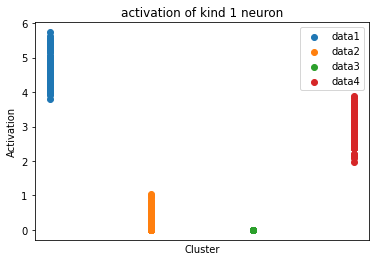

In [45]:
check_activation(neuron9, "kind 1")

In [46]:
neuron10 = Neuron(
    W=np.array([[-0.5, -0.5, -0.5, 2.0]]),
    bias=-0.5,
    layers=layer2
)

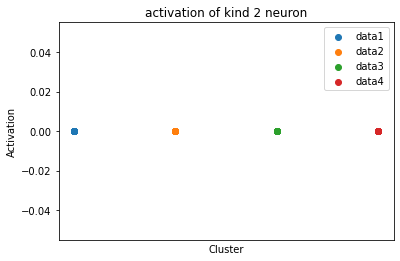

In [47]:
check_activation(neuron10, "kind 2")

# Ans3 

In [48]:
neuron1 = Neuron(
    W=np.array([[1.0, -1.0]]),
    bias = -1
)

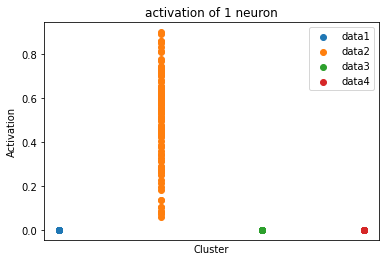

In [49]:
check_activation(neuron1, "1")

In [50]:
neuron2 = Neuron(
    W=np.array([[-1.0, 1.0]]),
    bias = -1
)

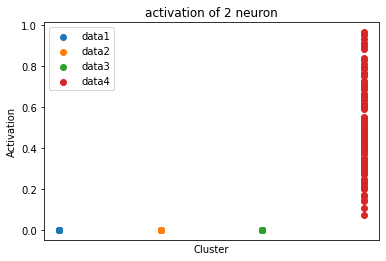

In [51]:
check_activation(neuron2, "2")

In [52]:
neuron3 = Neuron(
    W=np.array([[20.0, 20.0]]),
    bias = -1
)

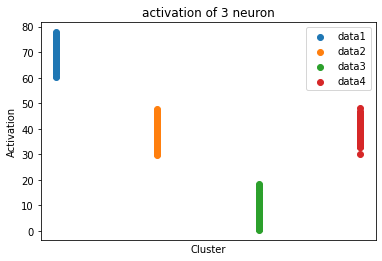

In [53]:
check_activation(neuron3, "3")

In [54]:
layer1 = [[neuron1, neuron2, neuron3]]

In [55]:
neuron4 = Neuron(
    W=np.array([[-1.0, 0.0, 1.0]]),
    bias=-1,
    layers =layer1
)

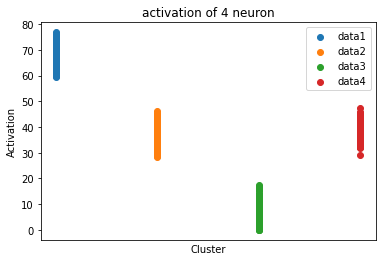

In [56]:
check_activation(neuron4, "4")

In [57]:
neuron5 = Neuron(
    W=np.array([[0.0, -1.0, 1.0]]),
    bias=-1,
    layers =layer1
)

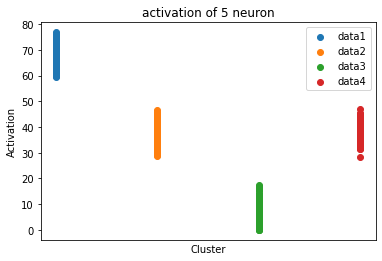

In [58]:
check_activation(neuron5, "5")

In [59]:
neuron6 = Neuron(
    W=np.array([[1.0, 1.0, 0.0]]),
    bias=-1,
    layers =layer1
)

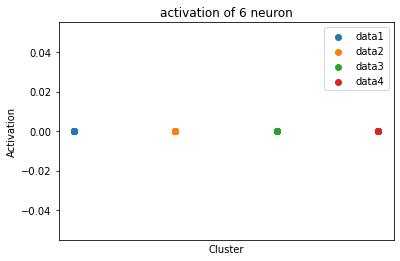

In [60]:
check_activation(neuron6, "6")

In [61]:
layer2 = [[neuron4, neuron5]]

In [62]:
neuron7 = Neuron(
    W=np.array([[0.5, 0.5]]),
    bias=-1,
    layers =layer2
)

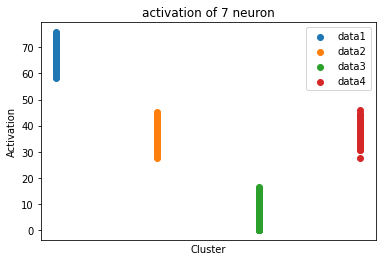

In [63]:
check_activation(neuron7, "7")

# Ans4

In [64]:
neuron1 = Neuron(
    W=np.array([[1.0, 0.5]]),
    bias=-0.5
)

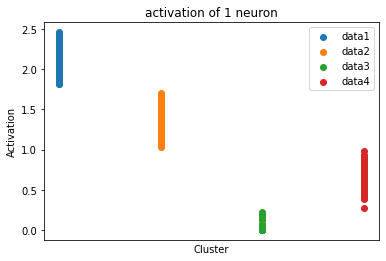

In [65]:
check_activation(neuron1, "1")

In [66]:
neuron2 = Neuron(
    W=np.array([[2.0, 1.5]]),
    bias=-0.5
)

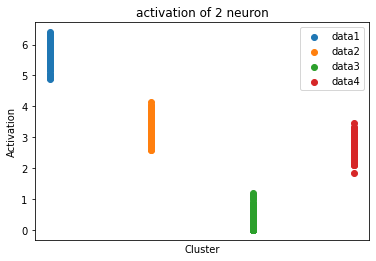

In [67]:
check_activation(neuron2, "2")

In [68]:
neuron3 = Neuron(
    W=np.array([[-1.0, 1.5]]),
    bias=-0.5
)

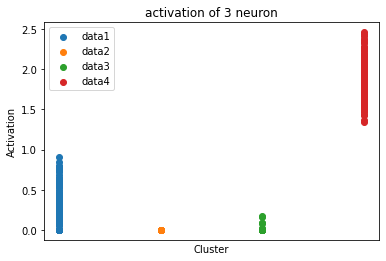

In [69]:
check_activation(neuron3, "3")

In [70]:
neuron4 = Neuron(
    W=np.array([[1.0, -2.0]]),
    bias=-0.5
)

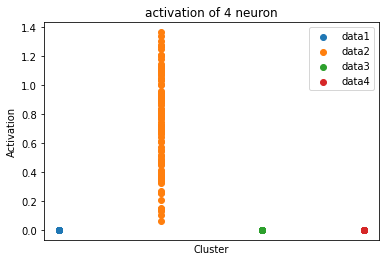

In [71]:
check_activation(neuron4, "4")

In [72]:
layer1 = [[neuron1, neuron2, neuron3, neuron4]]

In [73]:
neuron5 = Neuron(
    W=np.array([[2.0, 1.0, 1.0, 0.5]]),
    bias=-0.5,
    layers=layer1
)

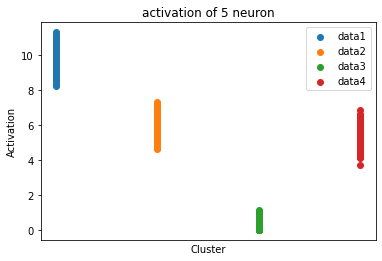

In [74]:
check_activation(neuron5, "5")

In [75]:
neuron6 = Neuron(
    W=np.array([[-2.0, 1.0, 2.0, -1.0]]),
    bias=-0.5,
    layers=layer1
)

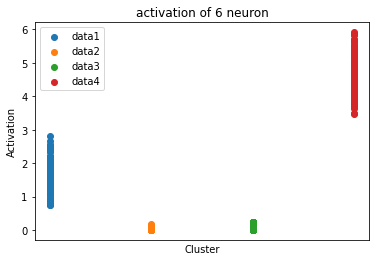

In [76]:
check_activation(neuron6, "6")

In [77]:
neuron7 = Neuron(
    W=np.array([[-2.0, 1.5, -1.5, -2.0]]),
    bias=-0.5,
    layers=layer1
)

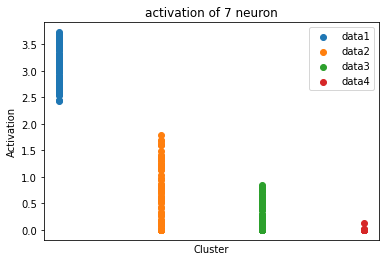

In [78]:
check_activation(neuron7, "7")

In [79]:
neuron8 = Neuron(
    W=np.array([[0.5, 0.5, -2.0, -1.5]]),
    bias=-0.5,
    layers=layer1
)

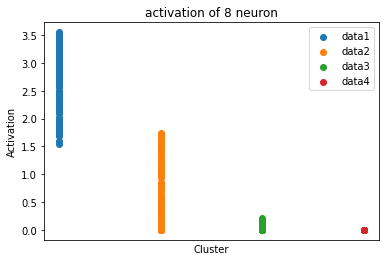

In [80]:
check_activation(neuron8, "8")

In [81]:
layer2 = [[neuron5, neuron6, neuron7, neuron8]]

In [82]:
neuron9 = Neuron(
    W=np.array([[1.0, -0.5, -1.5, 1.0]]),
    bias=-0.5,
    layers=layer2
)

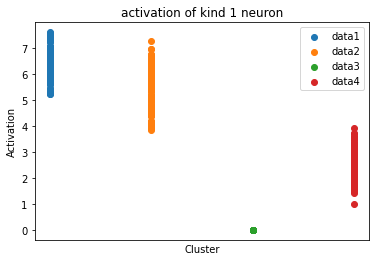

In [83]:
check_activation(neuron9, "kind 1")

In [84]:
neuron10 = Neuron(
    W=np.array([[0.5, 1.0, 1.5, -2.0]]),
    bias=-0.5,
    layers=layer2
)

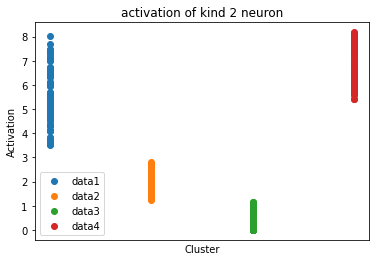

In [85]:
check_activation(neuron10, "kind 2")

# Ans5

In [86]:
neuron1 = Neuron(
    W=np.array([[0.5, 1.0]]),
    bias=-0.5
)

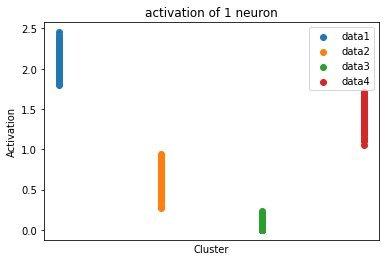

In [87]:
check_activation(neuron1, "1")

In [88]:
neuron2 = Neuron(
    W=np.array([[2.0, 1.5]]),
    bias=-0.5
)

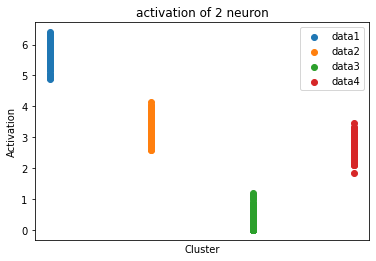

In [89]:
check_activation(neuron2, "2")

In [90]:
neuron3 = Neuron(
    W=np.array([[-1.0, 1.0]]),
    bias=-0.5
)

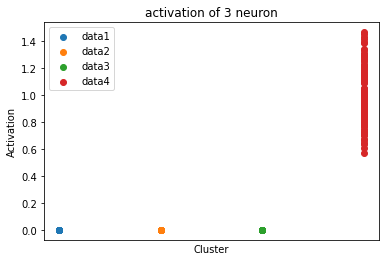

In [91]:
check_activation(neuron3, "3")

In [92]:
neuron4 = Neuron(
    W=np.array([[-2.0, -2.0]]),
    bias=-0.5
)

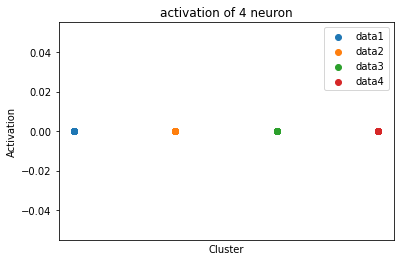

In [93]:
check_activation(neuron4, "4")

In [94]:
layer1 = [[neuron1, neuron2, neuron3, neuron4]]

In [95]:
neuron5 = Neuron(
    W=np.array([[1.0, 0.5, 1.5, 2.0]]),
    bias=-0.5,
    layers=layer1
)

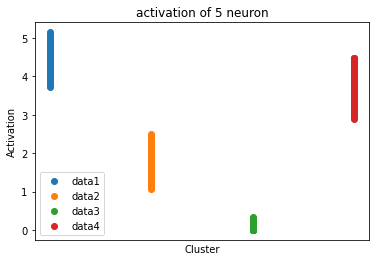

In [96]:
check_activation(neuron5, "5")

In [97]:
neuron6 = Neuron(
    W=np.array([[0.5, 1.0, 0.5, 1.5]]),
    bias=-0.5,
    layers=layer1
)

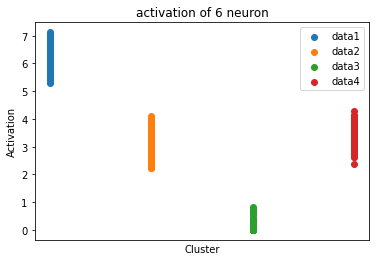

In [98]:
check_activation(neuron6, "6")

In [99]:
neuron7 = Neuron(
    W=np.array([[-1.0, 1.5, -1.5, 1.0]]),
    bias=-0.5,
    layers=layer1
)

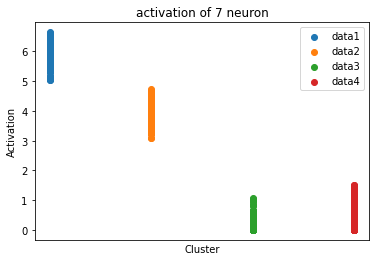

In [100]:
check_activation(neuron7, "7")

In [101]:
neuron8 = Neuron(
    W=np.array([[-1.5, -1.0, -1.0, 0.5]]),
    bias=-0.5,
    layers=layer1
)

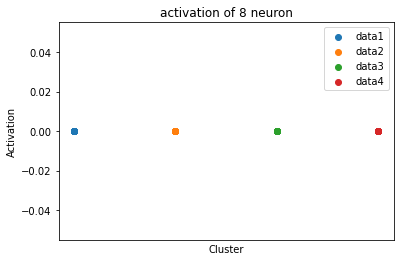

In [102]:
check_activation(neuron8, "8")

In [103]:
layer2 = [[neuron5, neuron6, neuron7, neuron8]]

In [104]:
neuron9 = Neuron(
    W=np.array([[1.0, 1.5, -1.0, 1.5]]),
    bias=-0.5,
    layers=layer2
)

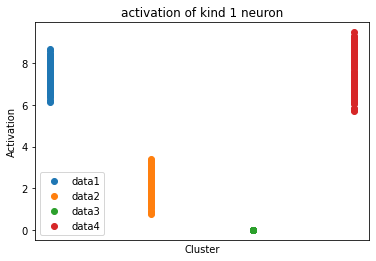

In [105]:
check_activation(neuron9, "kind 1")

In [106]:
neuron10 = Neuron(
    W=np.array([[-0.5, -0.5, -0.5, -2.0]]),
    bias=-0.5,
    layers=layer2
)

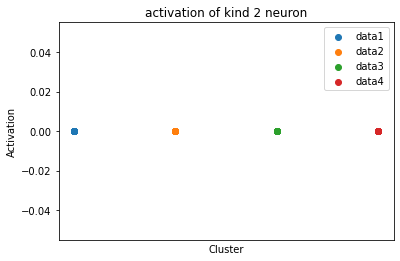

In [107]:
check_activation(neuron10, "kind 2")

# Ans5

In [108]:
class NeuronA:
    def __init__(self, W, layers=None):
        self.W = W
        self.layers = layers # Neuronのリストのリスト．入力層から順に並んでいる
    def forward(self, X):
        Z = X
        if self.layers is not None:
            for layer in self.layers:
                Z = np.array([list(neuron.forward(Z)) for neuron in layer]).T
        return np.where(np.dot(self.W,  Z.T) > 1, 3/4, 0)[0]

In [109]:
class NeuronB:
    def __init__(self, W, layers=None):
        self.W = W
        self.layers = layers # Neuronのリストのリスト．入力層から順に並んでいる
    def forward(self, X):
        Z = X
        if self.layers is not None:
            for layer in self.layers:
                Z = np.array([list(neuron.forward(Z)) for neuron in layer]).T
        return np.where(np.dot(self.W,  Z.T) <  1, 3/4, 0)[0]

In [110]:
neuron1 = NeuronA(
    W=np.array([[0, 1]])
)

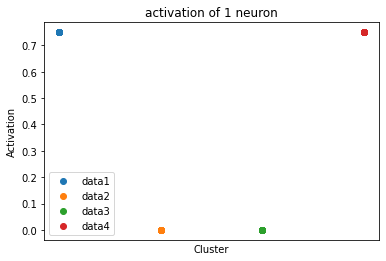

In [111]:
check_activation(neuron1, "1")

In [112]:
neuron2 = NeuronB(
    W=np.array([[0, 1]])
)

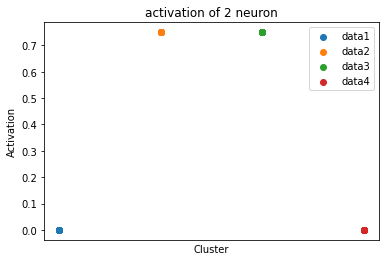

In [113]:
check_activation(neuron2, "2")

In [114]:
neuron3 = NeuronA(
    W=np.array([[1, 0]])
)

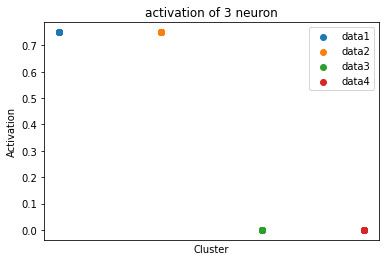

In [115]:
check_activation(neuron3, "3")

In [116]:
neuron4 = NeuronB(
    W=np.array([[0, 1]])
)

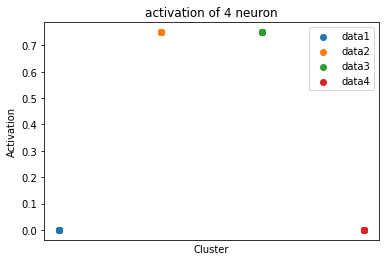

In [117]:
check_activation(neuron4, "4")

In [118]:
layer1 = [[neuron1, neuron2, neuron3, neuron4]]

In [119]:
neuron5 = NeuronA(
    W = np.array([[1, 0, 1, 0]]),
    layers=layer1
)

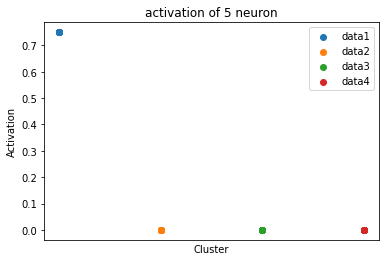

In [120]:
check_activation(neuron5, "5")

In [121]:
neuron6 = NeuronA(
    W = np.array([[0, 1, 0, 1]]),
    layers=layer1
)

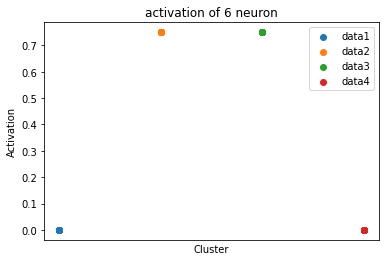

In [122]:
check_activation(neuron6, "6")

In [123]:
neuron7 = NeuronA(
    W = np.array([[0, 1, 1, 0]]),
    layers=layer1
)

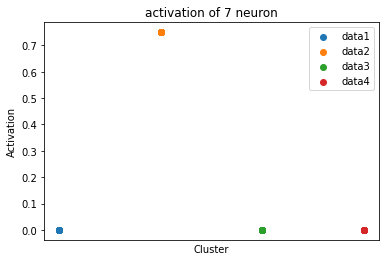

In [124]:
check_activation(neuron7, "7")

In [125]:
neuron8 = NeuronA(
    W = np.array([[1, 0, 0, 1]]),
    layers=layer1
)

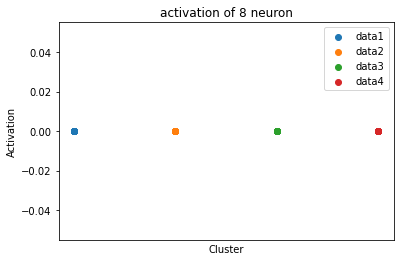

In [126]:
check_activation(neuron8, "8" )

In [127]:
layer2 = [[neuron5, neuron6, neuron7, neuron8]]

In [128]:
neuron9 = NeuronA(
    W=np.array([[1, 1, 0, 0]]),
    layers=layer2
)

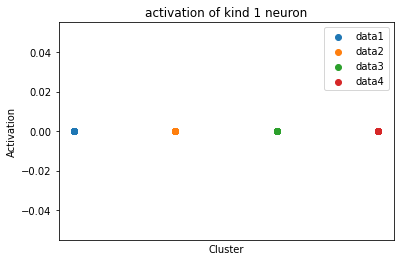

In [129]:
check_activation(neuron9, "kind 1")

In [130]:
neuron10 = NeuronA(
    W=np.array([[0, 0, 1, 1]]),
    layers=layer2
)

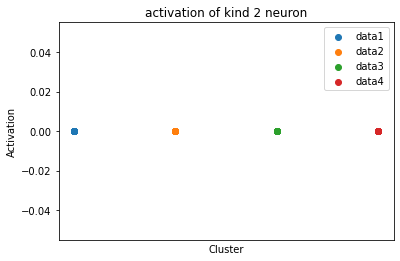

In [131]:
check_activation(neuron10, "kind 2")

# Ans6

In [132]:
class Neuron:
    def __init__(self, W, bias, layers=None):
        self.W = W
        self.bias = bias
        self.layers = layers # Neuronのリストのリスト．入力層から順に並んでいる
    def forward(self, X):
        Z = X
        if self.layers is not None:
            for layer in self.layers:
                Z = np.array([list(neuron.forward(Z)) for neuron in layer]).T
        return np.maximum(np.dot(self.W,  Z.T) + self.bias, 0)[0]

In [133]:
neuron1 = Neuron(
    W=np.array([[1.0, 2.0]]),
    bias=-1.0
)

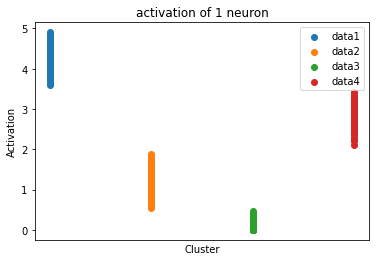

In [134]:
check_activation(neuron1, "1")

In [135]:
neuron2 = Neuron(
    W=np.array([[4.0, 3.0]]),
    bias=-1.0
)

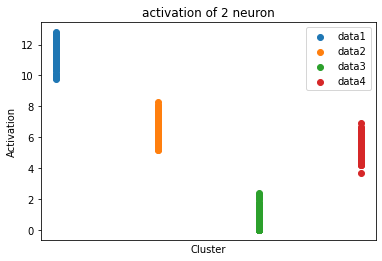

In [136]:
check_activation(neuron2, "2")

In [137]:
neuron3 = Neuron(
    W=np.array([[2.0, -2.0]]),
    bias=-1.0
)

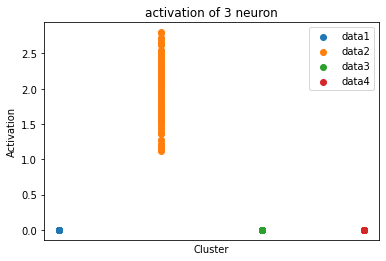

In [138]:
check_activation(neuron3, "3")

In [139]:
neuron4 = Neuron(
    W=np.array([[-4.0, -4.0]]),
    bias=-1.0
)

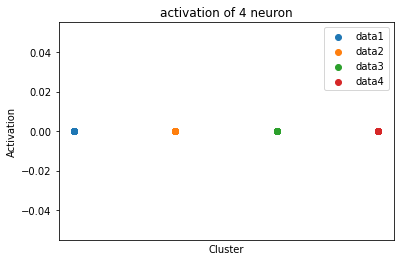

In [140]:
check_activation(neuron4, "4")

In [141]:
layer1 = [[neuron1, neuron2, neuron3, neuron4]]

In [142]:
neuron5 = Neuron(
    W=np.array([[2.0, 1.0, 2.0, 4.0]]),
    bias=-1.0,
    layers=layer1
)

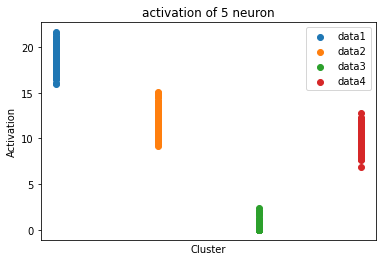

In [143]:
check_activation(neuron5, "5")

In [144]:
neuron6 = Neuron(
    W=np.array([[-2.0, 3.0, -2.0, 3.0]]),
    bias=-1.0,
    layers=layer1
)

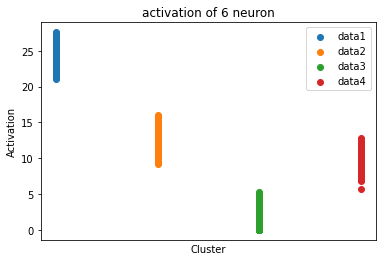

In [145]:
check_activation(neuron6, "6")

In [146]:
neuron7 = Neuron(
    W=np.array([[-2.0, 3.0, -2.0, 2.0]]),
    bias=-1.0,
    layers=layer1
)

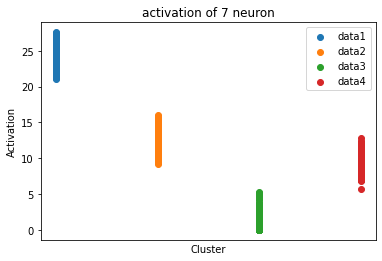

In [147]:
check_activation(neuron7, "7")

In [148]:
neuron8 = Neuron(
    W=np.array([[-3.0, -2.0, -3.0, 1.0]]),
    bias=-1.0,
    layers=layer1
)

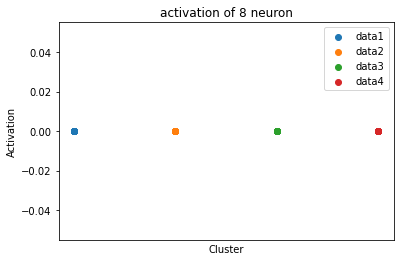

In [149]:
check_activation(neuron8, "8")

In [150]:
layer2 = [[neuron5, neuron6, neuron7, neuron8]]

In [151]:
neuron9 = Neuron(
    W=np.array([[2.0, 3.0, -2.0, 2.0]]),
    bias=-1.0,
    layers=layer2
)

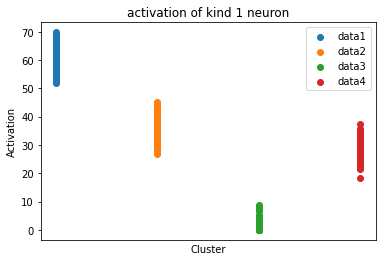

In [152]:
check_activation(neuron9, "kind 1")

In [153]:
neuron10 = Neuron(
    W=np.array([[-1.0, -1.0, -1.0, 4.0]]),
    bias=-1.0,
    layers=layer2
)

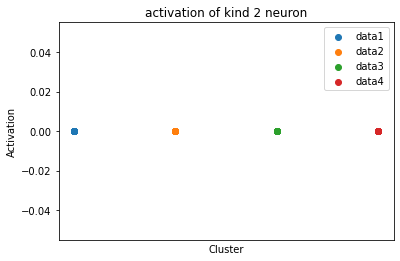

In [154]:
check_activation(neuron10, "kind 2")

 # Ans7
 

In [155]:
class Neuron:
    def __init__(self, W, bias, layers=None):
        self.W = W
        self.bias = 0
        self.layers = layers # Neuronのリストのリスト．入力層から順に並んでいる
    def forward(self, X):
        Z = X
        if self.layers is not None:
            for layer in self.layers:
                Z = np.array([list(neuron.forward(Z)) for neuron in layer]).T
        return np.where(np.dot(self.W,  Z.T) + self.bias >= 0, 1, 0)[0]

In [156]:
neuron1 = Neuron(
    W =  np.array([[2.5, 10.0]]),
    bias=-2.5
)

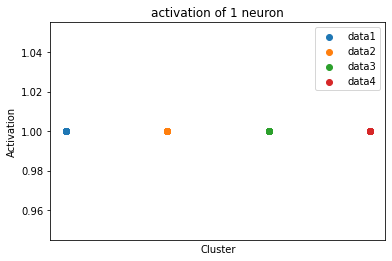

In [157]:
check_activation(neuron1, "1")

In [158]:
neuron2 = Neuron(
    W =  np.array([[10.0, -10.0]]),
    bias=-2.5
)

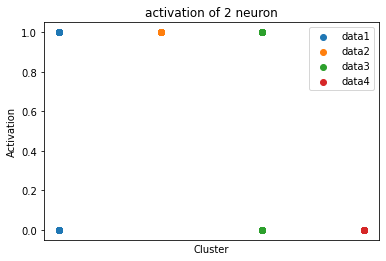

In [159]:
check_activation(neuron2, "2")

In [160]:
neuron3 = Neuron(
    W =  np.array([[-10.0, -5.0]]),
    bias=-2.5
)

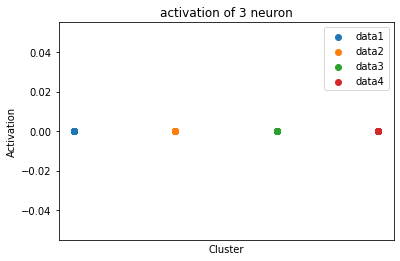

In [161]:
check_activation(neuron3, "3")

In [162]:
neuron4 = Neuron(
    W =  np.array([[-10.0, -10.0]]),
    bias=-2.5
)

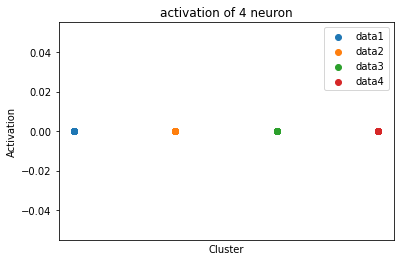

In [163]:
check_activation(neuron4, "4")

In [164]:
layer1 = [[neuron1, neuron2, neuron3, neuron4]]

###  メモ
解答者へ

途中の重みが書いていなかったため，実装ができませんでした．ご自身で続きを書いてみてこのネットワークがどのようにデータを分類するか確かめて見てくださいね．

 # Ans8
 

In [165]:
neuron1 = Neuron(
    W =  np.array([[0.7, 1.4]]),
    bias=-0.7
)

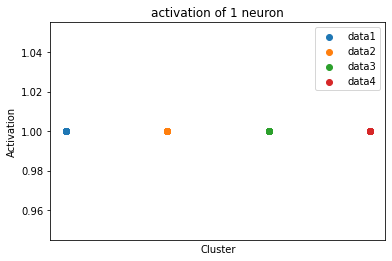

In [166]:
check_activation(neuron1, "1")

In [167]:
neuron2 = Neuron(
    W =  np.array([[2.8, 2.1]]),
    bias=-0.7
)

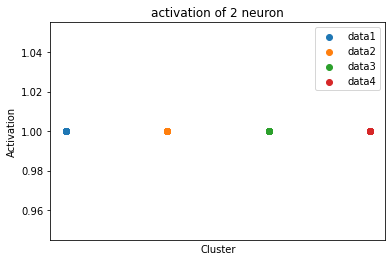

In [168]:
check_activation(neuron2, "2")

In [169]:
neuron3 = Neuron(
    W =  np.array([[-0.7, 2.1]]),
    bias=-0.7
)

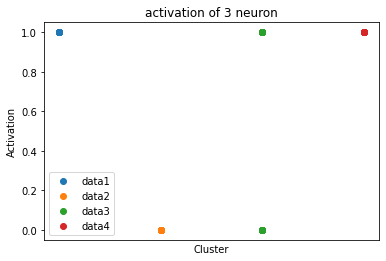

In [170]:
check_activation(neuron3, "3")

In [171]:
neuron4 = Neuron(
    W =  np.array([[-2.8, -1.4]]),
    bias=-0.7
)

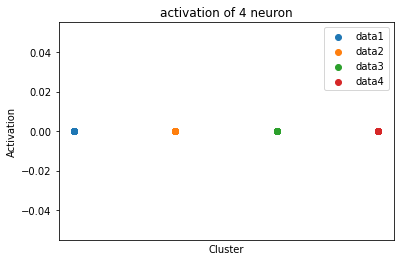

In [172]:
check_activation(neuron4, "4")

In [173]:
layer1 = [[neuron1, neuron2, neuron3, neuron4]]

In [174]:
neuron5 = Neuron(
    W =  np.array([[0.7, 2.8,  0, 0]]),
    bias=-0.7,
    layers=layer1
)

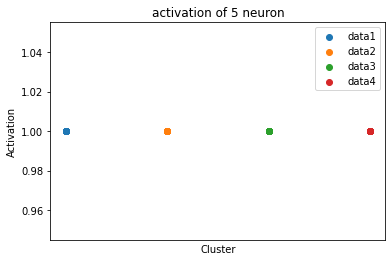

In [175]:
check_activation(neuron5, "5")

In [176]:
neuron6 = Neuron(
    W =  np.array([[1.4, 0.0,  -0.7, 0.0]]),
    bias=-0.7,
    layers=layer1
)

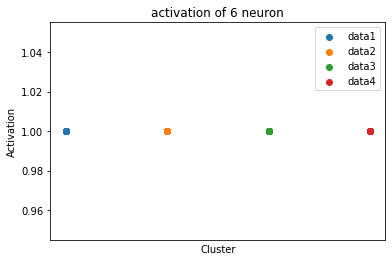

In [177]:
check_activation(neuron6, "6")

In [178]:
neuron7 = Neuron(
    W =  np.array([[0.0, 2.1,  0.0,  -1.4]]),
    bias=-0.7,
    layers=layer1
)

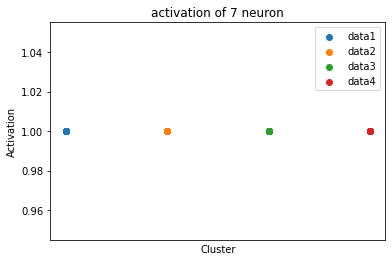

In [179]:
check_activation(neuron7, "7")

In [180]:
neuron8 = Neuron(
    W =  np.array([[0.0, 0.0,  -2.8, -1.4]]),
    bias=-0.7,
    layers=layer1
)

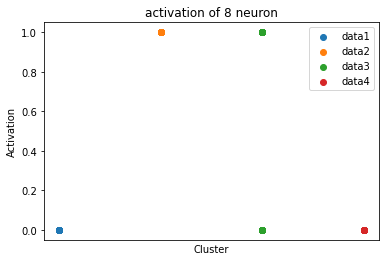

In [181]:
check_activation(neuron8, "8")

In [182]:
layer2 = [[neuron5, neuron6, neuron7, neuron8]]

In [183]:
neuron9 = Neuron(
    W =  np.array([[0.7, 1.4,  2.1, -2.8]]),
    bias=-0.7,
    layers=layer2
)

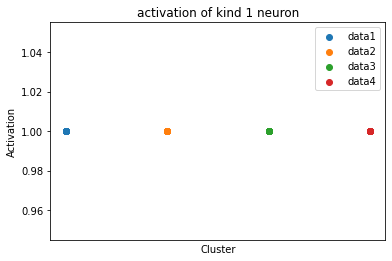

In [184]:
check_activation(neuron9, "kind 1")

In [185]:
neuron10 = Neuron(
    W =  np.array([[2.8, 0.7,  -1.4, -1.4]]),
    bias=-0.7,
    layers=layer2
)

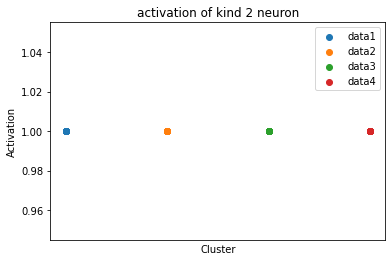

In [186]:
check_activation(neuron10, "kind 2")

# Ans9

In [187]:
class Neuron:
    def __init__(self, W, bias, layers=None):
        self.W = W
        self.bias = bias
        self.layers = layers # Neuronのリストのリスト．入力層から順に並んでいる
    def forward(self, X):
        Z = X
        if self.layers is not None:
            for layer in self.layers:
                Z = np.array([list(neuron.forward(Z)) for neuron in layer]).T
        return np.maximum(np.dot(self.W,  Z.T) + self.bias, 0)[0]

In [188]:
neuron1 = Neuron(
    W=np.array([[1.5, 3.0]]),
    bias=-1.5
)

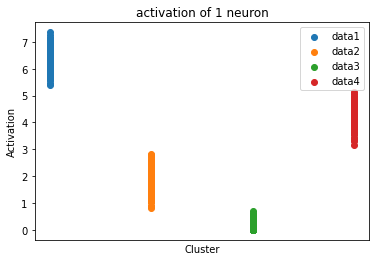

In [189]:
check_activation(neuron1, "1")

In [190]:
neuron2 = Neuron(
    W=np.array([[8.0, 4.5]]),
    bias=-1.5
)

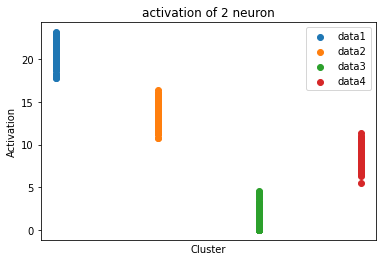

In [191]:
check_activation(neuron2, "2")

In [192]:
neuron3 = Neuron(
    W=np.array([[-3.0, -3.0]]),
    bias=-1.5
)

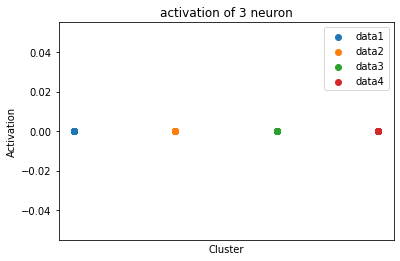

In [193]:
check_activation(neuron3, "3")

In [194]:
neuron4 = Neuron(
    W=np.array([[4.5, -6.0]]),
    bias=-1.5
)

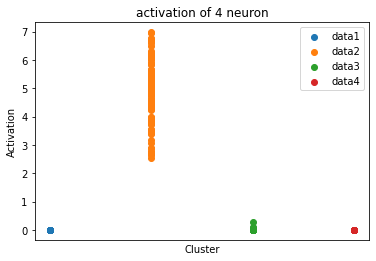

In [195]:
check_activation(neuron4, "4")

In [196]:
layer1 = [[neuron1, neuron2, neuron3, neuron4]]

In [197]:
neuron5 = Neuron(
    W=np.array([[3.0, 1.5, 4.5, 4.5]]),
    bias=-1.5,
    layers=layer1
)

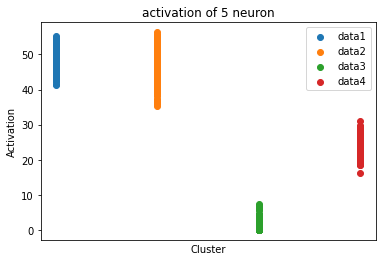

In [198]:
check_activation(neuron5, "5")

In [199]:
neuron6 = Neuron(
    W=np.array([[1.5, 3.0, 4.5, 4.5]]),
    bias=-1.5,
    layers=layer1
)

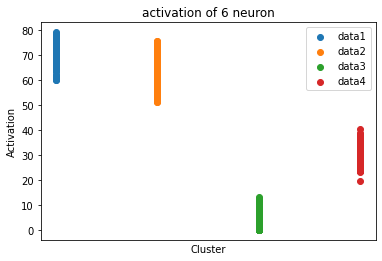

In [200]:
check_activation(neuron6, "6")

In [201]:
neuron7 = Neuron(
    W=np.array([[3.0, 4.5, 3.0, 3.0]]),
    bias=-1.5,
    layers=layer1
)

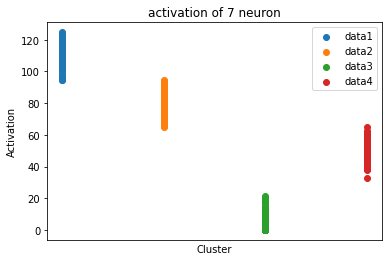

In [202]:
check_activation(neuron7, "7")

In [203]:
neuron8 = Neuron(
    W=np.array([[4.5, 3.0, 4.5, 1.5]]),
    bias=-1.5,
    layers=layer1
)

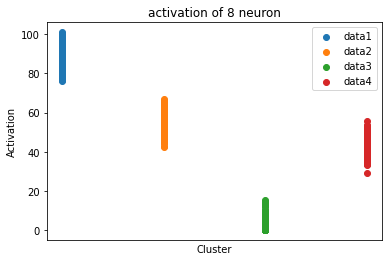

In [204]:
check_activation(neuron8, "8")

In [205]:
layer2 = [[neuron5, neuron6, neuron7, neuron8]]

In [206]:
neuron9 = Neuron(
    W=np.array([[3.0, 3.0, 3.0, 4.5]]),
    bias=-1.5,
    layers=layer2
)

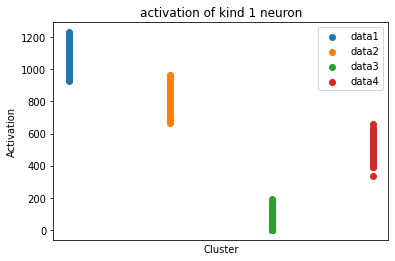

In [207]:
check_activation(neuron9, "kind 1")

In [208]:
neuron10 = Neuron(
    W=np.array([[1.5, -1.5, -1.5, 6.0]]),
    bias=-1.5,
    layers=layer2
)

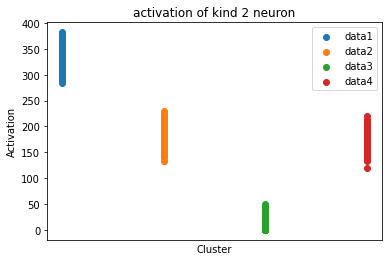

In [209]:
check_activation(neuron10, "kind 2")

# Ans10

In [210]:
class Neuron:
    def __init__(self, W, bias, layers=None):
        self.W = W
        self.bias = 0
        self.layers = layers # Neuronのリストのリスト．入力層から順に並んでいる
    def forward(self, X):
        Z = X
        if self.layers is not None:
            for layer in self.layers:
                Z = np.array([list(neuron.forward(Z)) for neuron in layer]).T
        return np.where(np.dot(self.W,  Z.T) + self.bias >= 0, 1, 0)[0]

In [211]:
bias = -0.5

In [212]:
neuron1 = Neuron(
    W=np.array([[1.0, -1.0]]),
    bias=bias
)

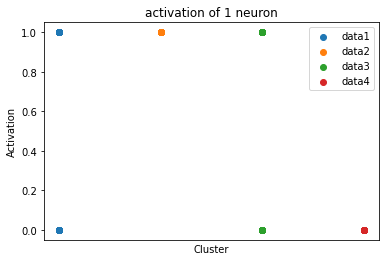

In [213]:
check_activation(neuron1, "1")

In [214]:
neuron2 = Neuron(
    W=np.array([[2.0, 0]]),
    bias=bias
)

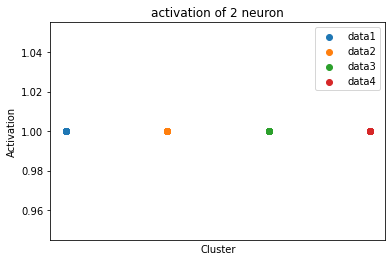

In [215]:
check_activation(neuron2, "2")

In [216]:
neuron3 = Neuron(
    W=np.array([[-1.0, 1.0]]),
    bias=bias
)

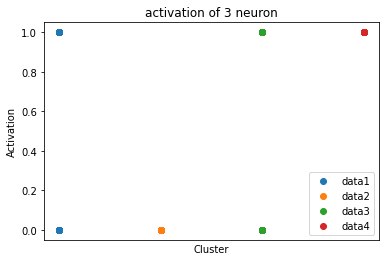

In [217]:
check_activation(neuron3, "3")

In [218]:
neuron4 = Neuron(
    W=np.array([[-1.0, 1.0]]),
    bias=bias
)

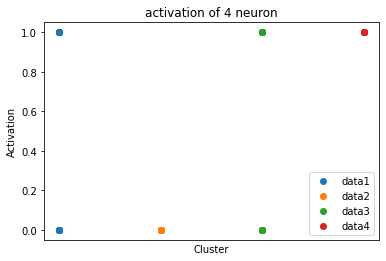

In [219]:
check_activation(neuron4, "4")

In [220]:
layer1 = [[neuron1, neuron2, neuron3, neuron4]]

In [221]:
neuron5 = Neuron(
    W=np.array([[1.0, -1.5, 1.5, 2.0]]),
    bias=bias,
    layers=layer1
)

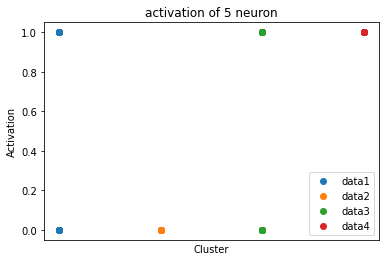

In [222]:
check_activation(neuron5, "5")

In [223]:
neuron6 = Neuron(
    W=np.array([[0.5, 0.5, 0.5, 1.5]]),
    bias=bias,
    layers=layer1
)

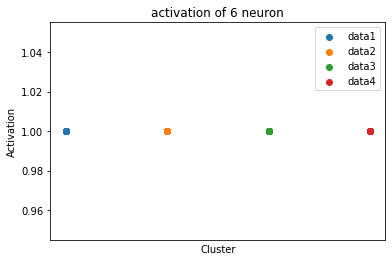

In [224]:
check_activation(neuron6, "6")

In [225]:
neuron7 = Neuron(
    W=np.array([[-1.0, 1.5, -1.0, 1.5]]),
    bias=bias,
    layers=layer1
)

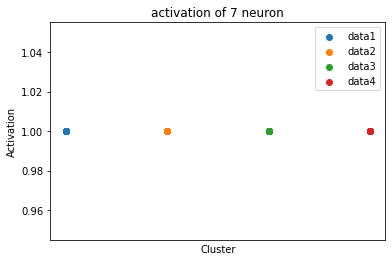

In [226]:
check_activation(neuron7, "7")

In [227]:
neuron8 = Neuron(
    W=np.array([[-1.5, -1.0, 1.5, 0.5]]),
    bias=bias,
    layers=layer1
)

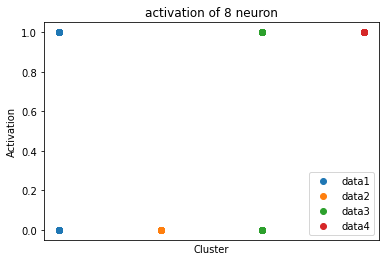

In [228]:
check_activation(neuron8, "8")

In [229]:
layer2 = [[neuron5, neuron6, neuron7, neuron8]]

In [230]:
neuron9 = Neuron(
    W=np.array([[1.0, 1.5, 0.5, 1.5]]),
    bias=bias,
    layers=layer2
)

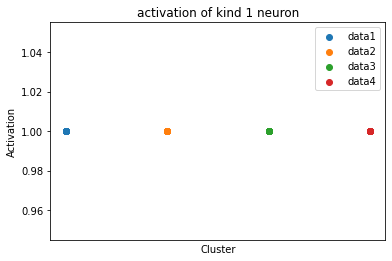

In [231]:
check_activation(neuron9, "kind 1")

In [232]:
neuron10 = Neuron(
    W=np.array([[1.5, 10.5, 0.5, 2.0]]),
    bias=bias,
    layers=layer2
)

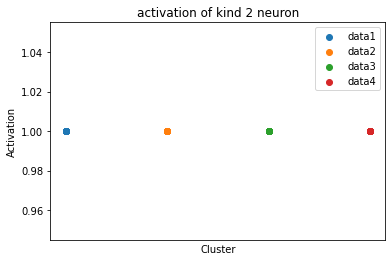

In [233]:
check_activation(neuron10, "kind 2")

# Ans11

In [234]:
class Neuron:
    def __init__(self, W, bias, layers=None):
        self.W = W
        self.bias = bias
        self.layers = layers # Neuronのリストのリスト．入力層から順に並んでいる
    def forward(self, X):
        Z = X
        if self.layers is not None:
            for layer in self.layers:
                Z = np.array([list(neuron.forward(Z)) for neuron in layer]).T
        return np.maximum(np.dot(self.W,  Z.T) + self.bias, 0)[0]

In [235]:
neuron1 = Neuron(
    W=np.array([[0.5, 2.0]]),
    bias=-0.5
)

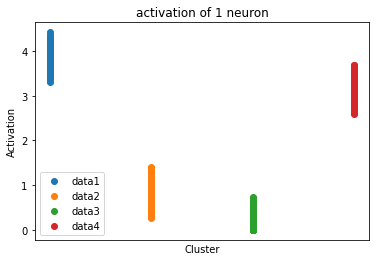

In [236]:
check_activation(neuron1, "1")

In [237]:
neuron2 = Neuron(
    W=np.array([[2.0, -1.5]]),
    bias=-0.5
)

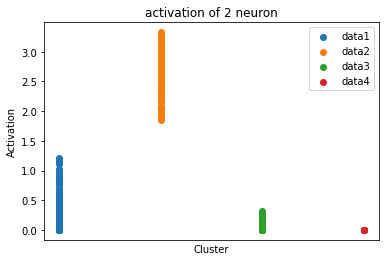

In [238]:
check_activation(neuron2, "2")

In [239]:
neuron3 = Neuron(
    W=np.array([[-1.0, -1.0]]),
    bias=-0.5
)

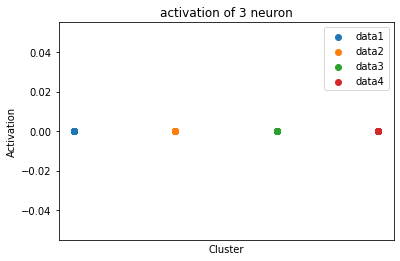

In [240]:
check_activation(neuron3, "3")

In [241]:
neuron4 = Neuron(
    W=np.array([[-1.0, -2.0]]),
    bias=-0.5
)

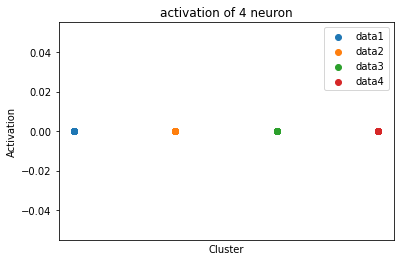

In [242]:
check_activation(neuron4, "4")

In [243]:
layer1 = [[neuron1, neuron2, neuron3, neuron4]]

In [244]:
neuron5 = Neuron(
    W=np.array([[1.0, 0.5, 1.5, 2.0]]),
    bias=-0.5,
    layers=layer1
)

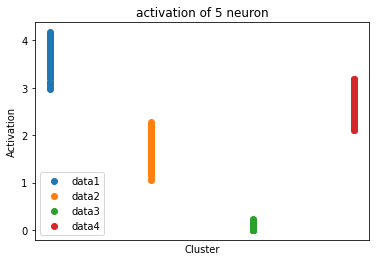

In [245]:
check_activation(neuron5, "5")

In [246]:
neuron6 = Neuron(
    W=np.array([[0.5, 1.0, -1.0, -1.0]]),
    bias=-0.5,
    layers=layer1
)

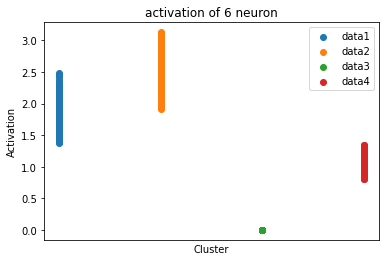

In [247]:
check_activation(neuron6, "6")

In [248]:
neuron7 = Neuron(
    W=np.array([[-1.0, -1.5, -1.0, -1.0]]),
    bias=-0.5,
    layers=layer1
)

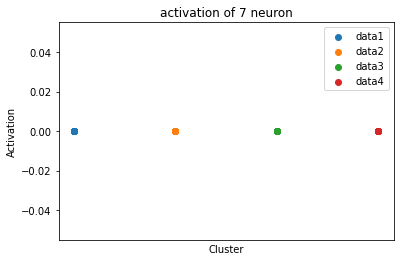

In [249]:
check_activation(neuron7, "7")

In [250]:
neuron8 = Neuron(
    W=np.array([[-1.5, -1.0, -1.5, 0.5]]),
    bias=-0.5,
    layers=layer1
)

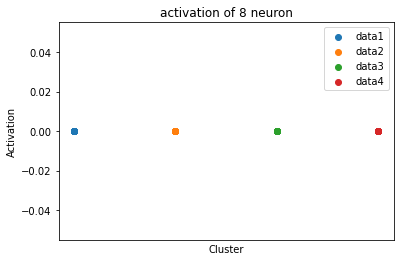

In [251]:
check_activation(neuron8, "8")

In [252]:
layer2 = [[neuron5, neuron6, neuron7, neuron8]]

In [253]:
neuron9 = Neuron(
    W=np.array([[1.0, 1.5, -1.0, 1.5]]),
    bias=-0.5,
    layers=layer2
)

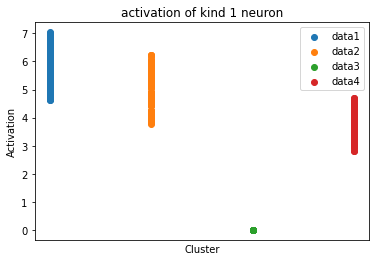

In [254]:
check_activation(neuron9, "kind 1")

In [255]:
neuron10 = Neuron(
    W=np.array([[-0.5, -0.5, -0.5, 2.0]]),
    bias=-0.5,
    layers=layer2
)

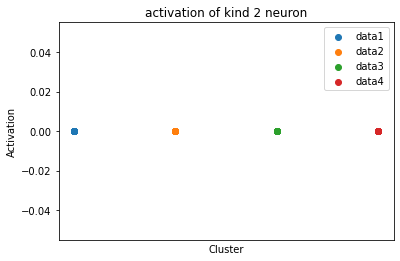

In [256]:
check_activation(neuron10, "kind 2")

# Ans12

In [257]:
class Neuron:
    def __init__(self, W, bias, layers=None):
        self.W = W
        self.bias = bias
        self.layers = layers # Neuronのリストのリスト．入力層から順に並んでいる
    def forward(self, X):
        Z = X
        if self.layers is not None:
            for layer in self.layers:
                Z = np.array([list(neuron.forward(Z)) for neuron in layer]).T
        return np.maximum(np.dot(self.W,  Z.T) + self.bias, 0)[0]

In [258]:
neuron1 = Neuron(
    W=np.array([[0.5, 1.0]]),
    bias=-0.5
)

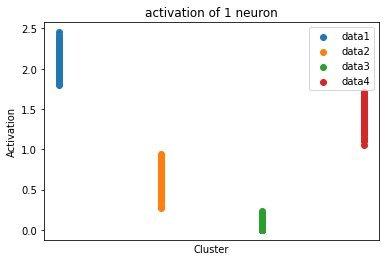

In [259]:
check_activation(neuron1, "1")

In [260]:
neuron2 = Neuron(
    W=np.array([[2.0, 1.5]]),
    bias=-0.5
)

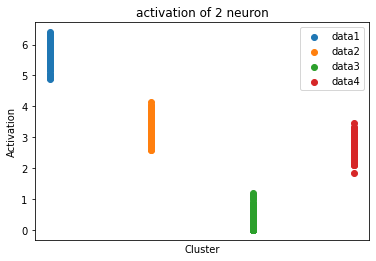

In [261]:
check_activation(neuron2, "2")

In [262]:
neuron3 = Neuron(
    W=np.array([[-1.0, -1.0]]),
    bias=-0.5
)

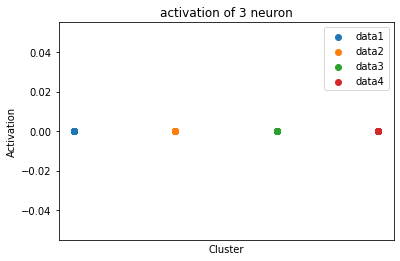

In [263]:
check_activation(neuron3, "3")

In [264]:
neuron4 = Neuron(
    W=np.array([[-2.0, -2.0]]),
    bias=-0.5
)

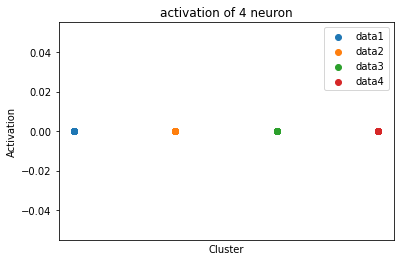

In [265]:
check_activation(neuron4, "4")

In [266]:
layer1 = [[neuron1, neuron2, neuron3, neuron4]]

In [267]:
neuron5 = Neuron(
    W=np.array([[1.0, 0.5, 1.5, 0.4]]),
    bias=-0.5,
    layers=layer1
)

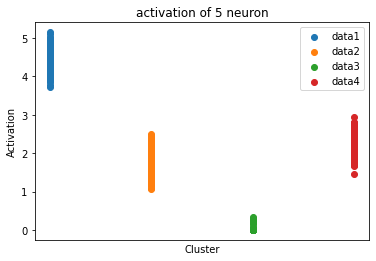

In [268]:
check_activation(neuron5, "5")

In [269]:
neuron6 = Neuron(
    W=np.array([[0.5, 1.0, 0.4, 1.5]]),
    bias=-0.5,
    layers=layer1
)

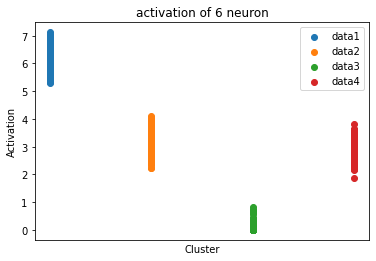

In [270]:
check_activation(neuron6, "6")

In [271]:
neuron7 = Neuron(
    W=np.array([[0.4, 1.5, 1.5, 1.0]]),
    bias=-0.5,
    layers=layer1
)

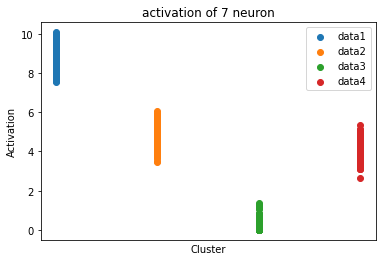

In [272]:
check_activation(neuron7, "7")

In [273]:
neuron8 = Neuron(
    W=np.array([[1.5, 0.5, 1.5, 0.5]]),
    bias=-0.5,
    layers=layer1
)

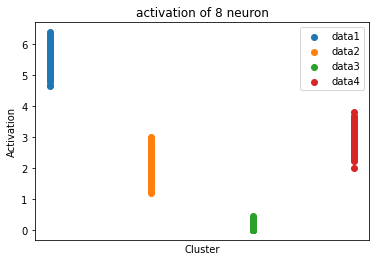

In [274]:
check_activation(neuron8, "8")

In [275]:
layer2 = [[neuron5, neuron6, neuron7, neuron8]]

In [276]:
neuron9 = Neuron(
    W=np.array([[1.0, 1.5, -1.0, 1.5]]),
    bias=-0.5,
    layers=layer2
)

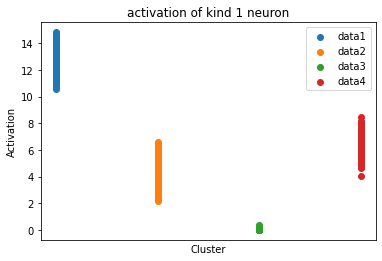

In [277]:
check_activation(neuron9, "kind 1")

In [278]:
neuron10 = Neuron(
    W=np.array([[-0.5, -0.5, -0.5, 2.0]]),
    bias=-0.5,
    layers=layer2
)

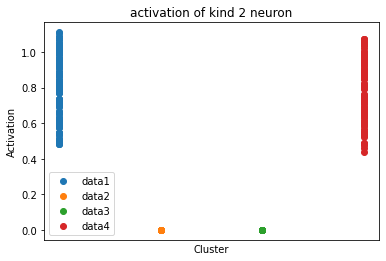

In [279]:
check_activation(neuron10, "kind 2")

# Ans13

In [280]:
class Neuron:
    def __init__(self, W, bias, layers=None):
        self.W = W
        self.bias = bias
        self.layers = layers # Neuronのリストのリスト．入力層から順に並んでいる
    def forward(self, X):
        Z = X
        if self.layers is not None:
            for layer in self.layers:
                Z = np.array([list(neuron.forward(Z)) for neuron in layer]).T
        return np.maximum(np.dot(self.W,  Z.T) + self.bias, 0)[0]

In [303]:
neuron1 = Neuron(
    W=np.array([[0.5, 0.5]]),
    bias=-0.5
)

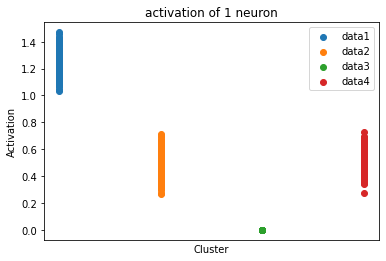

In [304]:
check_activation(neuron1, "1")

In [305]:
neuron2 = Neuron(
    W=np.array([[0.0, 2.0]]),
    bias=-1.0
)

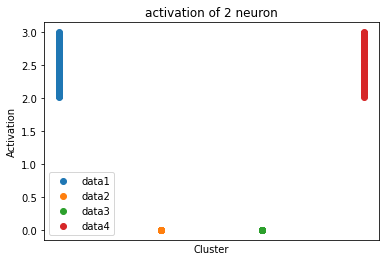

In [306]:
check_activation(neuron2, "2")

In [307]:
neuron3 = Neuron(
    W=np.array([[2.0, -1.0]]),
    bias=-0.5
)

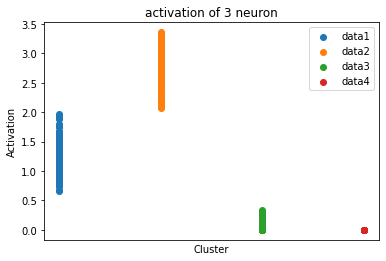

In [308]:
check_activation(neuron3, "3")

In [309]:
neuron4 = Neuron(
    W=np.array([[-1.0, -2.0]]),
    bias=0.5
)

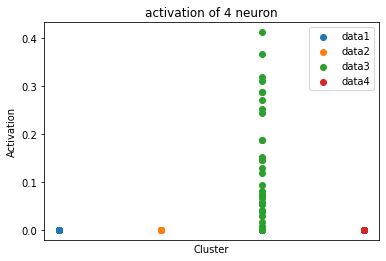

In [310]:
check_activation(neuron4, "4")

In [311]:
layer1 = [[neuron1, neuron2, neuron3, neuron4]]

In [312]:
neuron5 = Neuron(
    W=np.array([[1.0, 0.5, 1.5, 0.4]]),
    bias=-0.95,
    layers=layer1
)

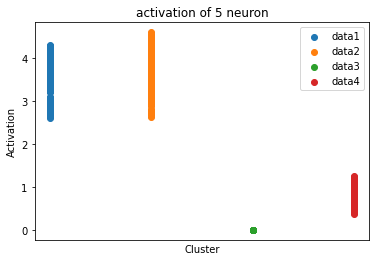

In [313]:
check_activation(neuron5, "5")

In [314]:
neuron6 = Neuron(
    W=np.array([[0.5, 1.0, 0.4, 1.5]]),
    bias=-3.25,
    layers=layer1
)

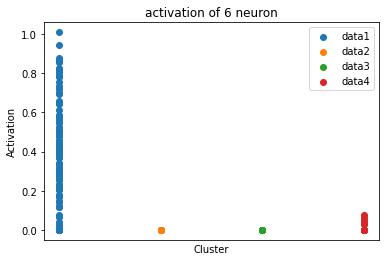

In [315]:
check_activation(neuron6, "6")

In [316]:
neuron7 = Neuron(
    W=np.array([[0.4, 1.5, 1.5, 1.0]]),
    bias=0,
    layers=layer1
)

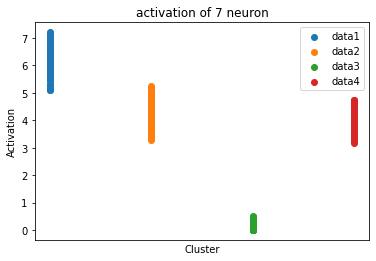

In [317]:
check_activation(neuron7, "7")

In [318]:
neuron8 = Neuron(
    W=np.array([[1.5, 0.5, 1.5, 0.5]]),
    bias=0.5,
    layers=layer1
)

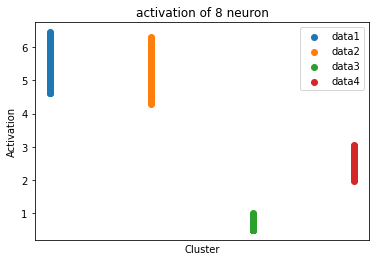

In [319]:
check_activation(neuron8, "8")

In [320]:
layer2 = [[neuron5, neuron6, neuron7, neuron8]]

In [327]:
neuron9 = Neuron(
    W=np.array([[0.5, 0.5, 0.5, 0.5]]),
    bias=0,
    layers=layer2
)

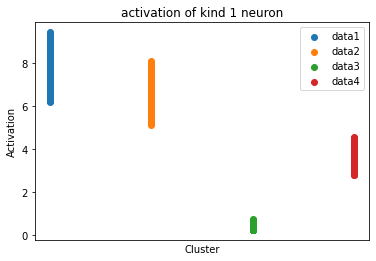

In [328]:
check_activation(neuron9, "kind 1")

In [329]:
neuron10 = Neuron(
    W=np.array([[2.0, 2.0, 2.0, 2.0]]),
    bias=0,
    layers=layer2
)

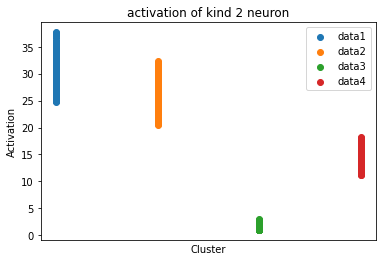

In [330]:
check_activation(neuron10, "kind 2")

# Ans14

In [331]:
class Neuron:
    def __init__(self, W, bias, layers=None):
        self.W = W
        self.bias = bias
        self.layers = layers # Neuronのリストのリスト．入力層から順に並んでいる
    def forward(self, X):
        Z = X
        if self.layers is not None:
            for layer in self.layers:
                Z = np.array([list(neuron.forward(Z)) for neuron in layer]).T
        return np.maximum(np.dot(self.W,  Z.T) + self.bias, 0)[0]

In [332]:
neuron1 = Neuron(
    W=np.array([[5, 10]]),
    bias=-5
)

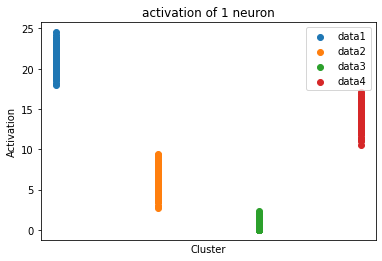

In [333]:
check_activation(neuron1, "1")

In [336]:
neuron2 = Neuron(
    W=np.array([[20, 15]]),
    bias=-5
)

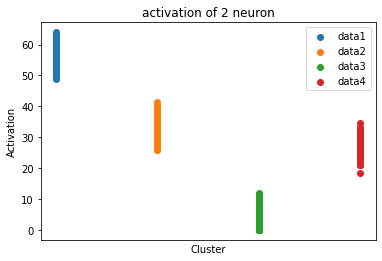

In [337]:
check_activation(neuron2, "2")

In [338]:
neuron3 = Neuron(
    W=np.array([[-10, 15]]),
    bias=-5
)

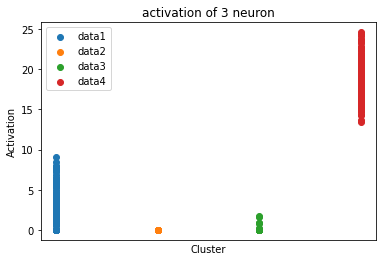

In [339]:
check_activation(neuron3, "3")

In [342]:
neuron4 = Neuron(
    W=np.array([[-20, -20]]),
    bias=-5
)

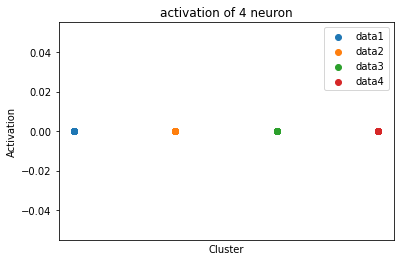

In [343]:
check_activation(neuron4, "4")

In [344]:
layer1 = [[neuron1, neuron2, neuron3, neuron4]]

In [345]:
neuron5 = Neuron(
    W=np.array([[10, 5, 15, -20]]),
    bias=-5,
    layers=layer1
)

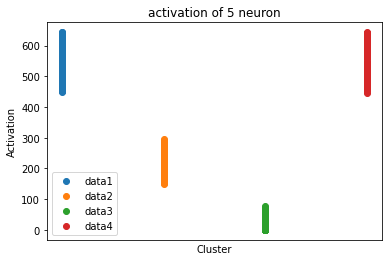

In [346]:
check_activation(neuron5, "5")

In [347]:
neuron6 = Neuron(
    W=np.array([[5, 10, 15, 15]]),
    bias=-5,
    layers=layer1
)

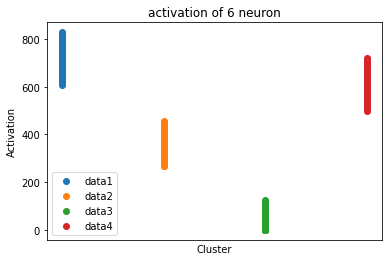

In [348]:
check_activation(neuron6, "6")

In [349]:
neuron7 = Neuron(
    W=np.array([[-10, 15, -10, 10]]),
    bias=5,
    layers=layer1
)

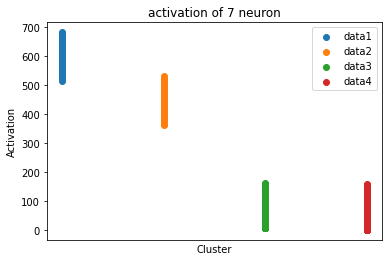

In [350]:
check_activation(neuron7, "7")

In [351]:
neuron8 = Neuron(
    W=np.array([[-15, -10, -15, 5]]),
    bias=-5,
    layers=layer1
)

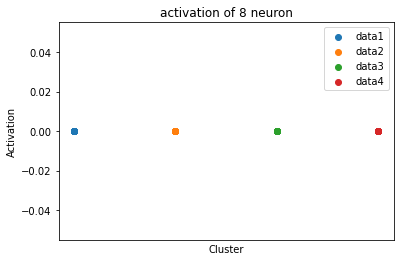

In [352]:
check_activation(neuron8, "8")

In [353]:
layer2 = [[neuron5, neuron6, neuron7, neuron8]]

In [356]:
neuron9 = Neuron(
    W=np.array([[10, 15, -10, 15]]),
    bias=-5,
    layers=layer2
)

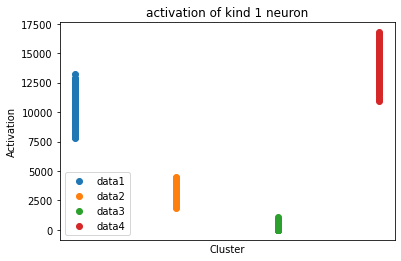

In [357]:
check_activation(neuron9, "kind 1")

In [358]:
neuron10 = Neuron(
    W=np.array([[-5, -5, -5, 20]]),
    bias=-5,
    layers=layer2
)

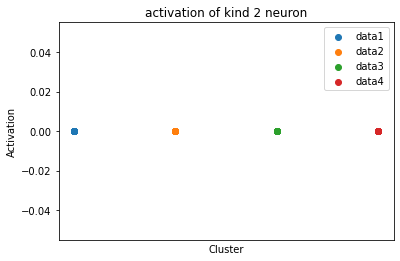

In [359]:
check_activation(neuron10, "kind 2")